In [1]:
# import libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [10]:
# Data Gathering
df=pd.read_csv('stud.csv')
df.head()

,cgpa,iq,profile_score,placed
0,5.97,106,61,0
1,6.83,113,77,0
2,6.60,110,61,0
3,5.54,113,68,0
4,6.84,102,67,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cgpa           300 non-null    float64
 1   iq             300 non-null    int64  
 2   profile_score  300 non-null    int64  
 3   placed         300 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 9.5 KB


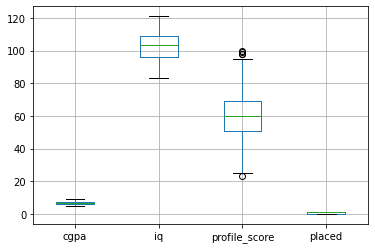

In [12]:
df.boxplot()

In [13]:
# Remove outliers from profile score column
q1=df['profile_score'].quantile(0.25)
q3=df['profile_score'].quantile(0.75)
print(f"q1={q1}, q3={q3}")
iqr=q3-q1
print("IQR",iqr)
lt=q1-1.5*iqr
ut=q3+1.5*iqr
print("lt",lt)
print("ut",ut)

q1=51.0, q3=69.0
IQR 18.0
lt 24.0
ut 96.0


In [14]:
df1=df.loc[(df["profile_score"]>ut)| (df["profile_score"]<lt)].index
df1

Int64Index([7, 191, 206, 212, 249], dtype='int64')

In [16]:
# Replace the outliers with median value
df['profile_score'].loc[df1]=df["profile_score"].median()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


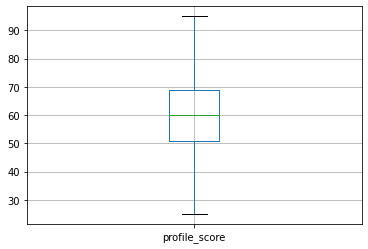

In [17]:
df.boxplot("profile_score")

In [18]:
x=df.drop("placed",axis=1)
y=df["placed"]

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10,stratify=y)

In [20]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [22]:
# Accuracy on Testing
y_pred=lr.predict(x_test)
con_mat=confusion_matrix(y_test,y_pred)
print("confusion matrics is",con_mat)
cr=classification_report(y_test,y_pred)
print("classification repost is",cr)
acc_score=accuracy_score(y_test,y_pred)
print("accuracy score is",acc_score)

confusion matrics is [[28  2]
 [ 2 28]]
classification repost is               precision    recall  f1-score   support

           0       0.93      0.93      0.93        30
           1       0.93      0.93      0.93        30

    accuracy                           0.93        60
   macro avg       0.93      0.93      0.93        60
weighted avg       0.93      0.93      0.93        60

accuracy score is 0.9333333333333333


In [23]:
# create a pickle file
pickle.dump(lr,open("lr_student.pkl","wb"))